In [1]:
# Beachwatch Logistic Regressions

In [2]:
import matplotlib.pyplot as plt 
import metapack as mp
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [3]:
import metapack as mp
pkg = mp.open_package('http://library.metatab.org/sandiegodata.org-beachwatch-4.zip')
beachwatch =    pkg.resource('beachwatch').read_csv(parse_dates=True)
measure_codes = pkg.resource('measure_codes').read_csv(parse_dates=True)
stations =      pkg.resource('stations').read_csv(parse_dates=True)

beachwatch.head()

,stationcode,stationgroup,sampledate,collectiontime,measure_code,analyte,methodname,unit,result,result_group_count,...,lresult_gt_lmedian,lresult_gt_lmean,lresult_lte_25pctl,lresult_gte_75pctl,labbatch,resultqualcode,qacode,sampleagency,labagency,submittingagency
0,EH-010,EH,1999-05-26,2018-11-15,0,"Coliform, Fecal",MTF,MPN/100 mL,20.0,213,...,0.0,0.0,0.0,1.0,SH-5/26/1999,<,NR,SDCDEH,SDCDEH,SDCDEH
1,EH-010,EH,1999-10-13,2018-11-15,0,"Coliform, Fecal",MTF,MPN/100 mL,0.0,213,...,0.0,0.0,0.0,0.0,SH-10/13/1999,=,NR,SDCDEH,SDCDEH,SDCDEH
2,EH-010,EH,1999-10-26,2018-11-15,0,"Coliform, Fecal",MTF,MPN/100 mL,20.0,213,...,0.0,0.0,0.0,1.0,SH-10/26/1999,<,NR,SDCDEH,SDCDEH,SDCDEH
3,EH-010,EH,2000-03-21,2018-11-15,0,"Coliform, Fecal",MTF,MPN/100 mL,20.0,213,...,0.0,0.0,0.0,1.0,SH-3/21/2000,<,NR,SDCDEH,SDCDEH,SDCDEH
4,EH-010,EH,2000-05-24,2018-11-15,0,"Coliform, Fecal",MTF,MPN/100 mL,230.0,213,...,1.0,1.0,0.0,1.0,SH-5/24/2000,=,NR,SDCDEH,SDCDEH,SDCDEH


In [4]:

beachwatch.lresult_gt_lmedian.value_counts(dropna=False)

0.0    136183
1.0     66074
Name: lresult_gt_lmedian, dtype: int64

In [5]:
# Proportion of gt_mean and mt_median that are different. 
len(beachwatch[ beachwatch.lresult_gt_lmedian.notnull() & beachwatch.lresult_gt_lmedian.notnull() &  
        (beachwatch.lresult_gt_lmedian != beachwatch.lresult_gt_lmean)])  / len(beachwatch)

0.043489224105964196

# Merge in environmental data

In [6]:
env_pkg =  mp.open_package('http://library.metatab.org/sandiegodata.org-water_quality-4.zip')

In [7]:
trr = env_pkg.resource('tides_river_rain').read_csv(parse_dates=True).set_index('date')
trr.head()

,discharge_rate,recent_total_discharge,recent_max_discharge,dailyprecip,recent_precip,wl_max,wl_min
date,,,,,,,
1988-01-01,22.0,22.0,22.0,NaN,NaN,NaN,NaN
1988-01-02,20.0,42.0,42.0,NaN,NaN,NaN,NaN
1988-01-03,18.0,60.0,60.0,NaN,NaN,NaN,NaN
1988-01-04,18.0,56.0,60.0,NaN,NaN,NaN,NaN
1988-01-05,21.0,57.0,60.0,NaN,NaN,NaN,NaN


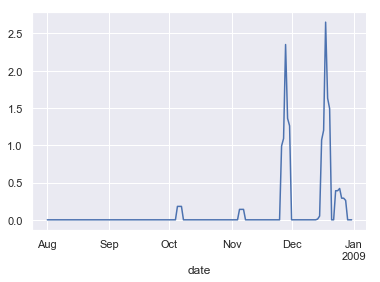

In [8]:
trr.loc['2007':'2008'].recent_precip.plot()

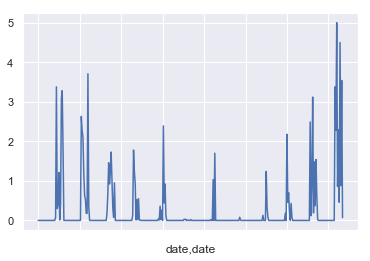

In [9]:
trr.groupby(by=[trr.index.month, trr.index.year]).sum().dailyprecip.plot()

# Rain Seasonality

Maybe there is a stonger correlation to precipitation in the first rains of the season? The guess is that late in the season, pollutants and nutrients have already been washed out by the early rains, so there should be more pollution earlier in the season. 


In [10]:
bw_env = beachwatch.set_index('sampledate').join(trr)
bw_env['high_flow'] =  (bw_env.recent_total_discharge > bw_env.recent_total_discharge.median()).astype(int)
bw_env['ldischarge_rate'] = np.log(bw_env.discharge_rate)
bw_env.head()

,stationcode,stationgroup,collectiontime,measure_code,analyte,methodname,unit,result,result_group_count,result_group_std,...,submittingagency,discharge_rate,recent_total_discharge,recent_max_discharge,dailyprecip,recent_precip,wl_max,wl_min,high_flow,ldischarge_rate
1998-07-21,SE-010,SE,2018-11-15,0,"Coliform, Fecal",MTF,MPN/100 mL,4.0,527,225.561709,...,SEJPA,8.8,27.0,27.4,NaN,NaN,NaN,NaN,1,2.174752
1998-07-21,SE-010,SE,2018-11-15,9,"Coliform, Total",MTF,MPN/100 mL,4.0,530,309.086717,...,SEJPA,8.8,27.0,27.4,NaN,NaN,NaN,NaN,1,2.174752
1998-07-21,SE-010,SE,2018-11-15,26,Enterococcus,MTF,MPN/100 mL,2.0,488,148.631518,...,SEJPA,8.8,27.0,27.4,NaN,NaN,NaN,NaN,1,2.174752
1998-07-21,SE-020,SE,2018-11-15,0,"Coliform, Fecal",MTF,MPN/100 mL,23.0,477,128.262880,...,SEJPA,8.8,27.0,27.4,NaN,NaN,NaN,NaN,1,2.174752
1998-07-21,SE-020,SE,2018-11-15,9,"Coliform, Total",MTF,MPN/100 mL,23.0,477,263.711243,...,SEJPA,8.8,27.0,27.4,NaN,NaN,NaN,NaN,1,2.174752


In [11]:
# Compute the quartile of rainfall for each month

_1 = pd.qcut(trr.groupby(trr.index.month).sum().dailyprecip, 
             q=[0, .3, .5, .75, 1.], # .3 not .25 to smooth out summer
            labels=[1,2,3,4])

dmap = {e['date']:e['dailyprecip'] for _,e in _1.to_frame().reset_index().iterrows()}

#trr.apply( lambda row: dmap[row.index.month])
bw_env['month'] = bw_env.index.month
bw_env['precip_month_q'] = bw_env.month.apply(lambda v: dmap[v])



In [12]:
# How many years of rain data?
_1 = trr.dailyprecip.dropna()
span = (_1.index.max() - _1.index.min()).days/365

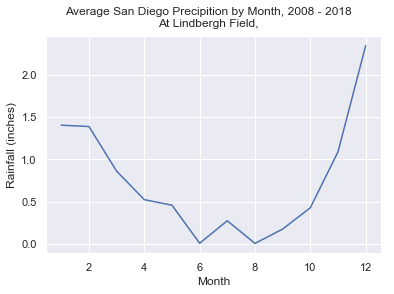

In [13]:
fig, axes = plt.subplots(1)

(trr.groupby(trr.index.month).sum().dailyprecip/span).plot(ax=axes)

fig.suptitle('Average San Diego Precipition by Month, 2008 - 2018\nAt Lindbergh Field,')
plt.xlabel('Month')
plt.ylabel("Rainfall (inches)");


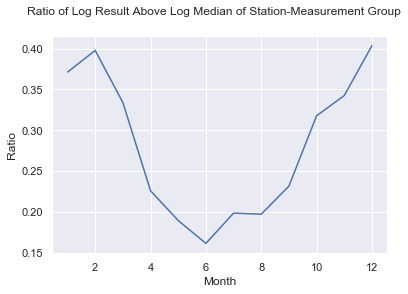

In [14]:
fig, ax = plt.subplots(1)

_1 = bw_env[(bw_env.measure_code==24)].copy()
_1['dummy'] = 1
# Values for lresult_gt_lmedian are 0 or 1, so sum() is counting # of vlaues that == 1
_2 = _1.groupby([_1.month,_1.lresult_gt_lmedian]).count().dummy.unstack(1)
_2['ratio'] = _2[1.0] / (_2[0.0]+_2[1.0])
_2.ratio.plot(ax=ax)

fig.suptitle('Ratio of Log Result Above Log Median of Station-Measurement Group')
plt.xlabel('Month')
plt.ylabel("Ratio");

In [15]:
bw_env[(bw_env.measure_code==24)].stationcode.value_counts().sort_values(ascending=False).head()

EH-420    1081
FM-010     990
IB-080     981
OC-100     963
FM-100     919
Name: stationcode, dtype: int64

In [16]:
def plot_group(group):
    fig, ax = plt.subplots(1)

    _1 = bw_env[(bw_env.measure_code==24) & (bw_env.stationgroup == group)].copy()
    _1['dummy'] = 1
    # Values for lresult_gt_lmedian are 0 or 1, so sum() is counting # of vlaues that == 1
    _2 = _1.groupby([_1.month,_1.lresult_gt_lmedian]).count().dummy.unstack(1)
    _2['ratio'] = _2[1.0] / (_2[0.0]+_2[1.0])
    _2.ratio.plot(ax=ax)

    fig.suptitle('Ratio of Log Result Above Log Median of Station-Measurement Group')
    plt.xlabel('Month')
    plt.ylabel("Ratio");
    

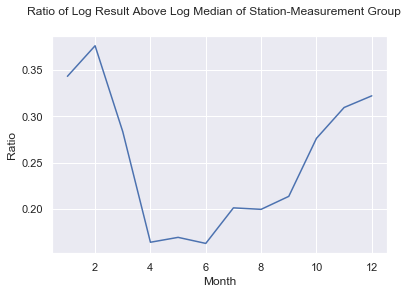

In [17]:
    
plot_group('EH')

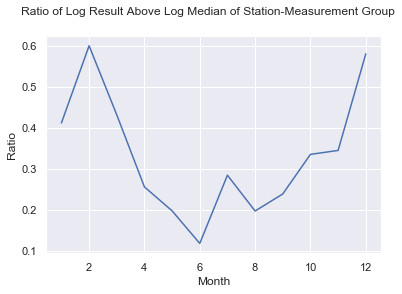

In [18]:
plot_group('IB')

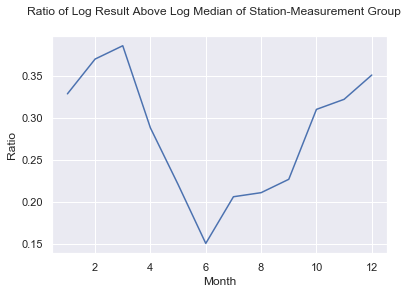

In [19]:
plot_group('FM')

In [90]:
t = beachwatch[(beachwatch.measure_code == 24)].copy()
t['exceeded'] = t.result > 104
t = t.groupby(['stationgroup','exceeded']).count().result.to_frame().unstack()
t.columns = ['F','T']
t['percent'] = (t['T']/(t['F']+t['T'])*100).round(2)
t

,F,T,percent
stationgroup,,,
EH,16302.0,1076.0,6.19
EN,1131.0,14.0,1.22
FM,3331.0,243.0,6.80
IB,2507.0,333.0,11.73
MB,6235.0,582.0,8.54
OC,4599.0,289.0,5.91
PL,1584.0,75.0,4.52
SC,14.0,NaN,NaN
SE,1801.0,99.0,5.21


In [31]:
t.exceeded.value_counts()

False    37623
True      2726
Name: exceeded, dtype: int64

In [33]:
t.result_gt_mean.value_counts()

0.0    36149
1.0     4200
Name: result_gt_mean, dtype: int64

In [34]:
t.lresult_gt_lmean.value_counts()

0.0    30910
1.0     9439
Name: lresult_gt_lmean, dtype: int64

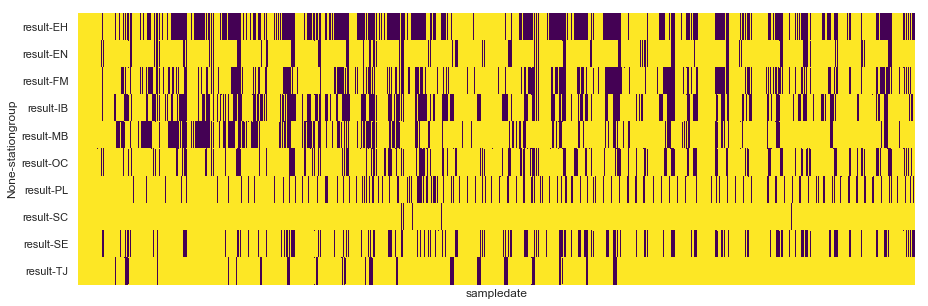

In [63]:
import seaborn as sns 

t = beachwatch[['sampledate','result', 'stationgroup']].drop_duplicates(['sampledate', 'stationgroup'])
t = t.set_index(['sampledate','stationgroup']).unstack().resample('1D').mean()

fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(t.isnull().T,cbar=False,xticklabels=False,cmap = 'viridis', ax=ax )

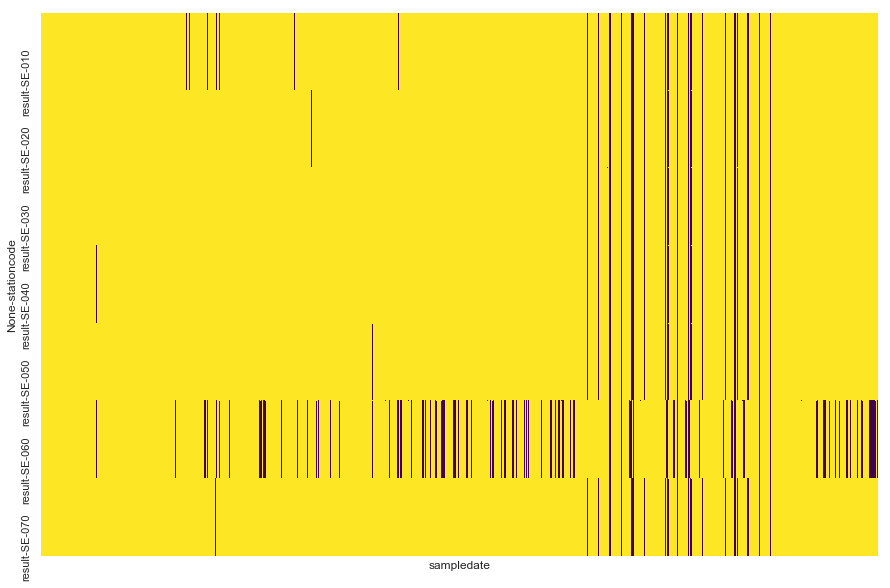

In [94]:
t = beachwatch[(beachwatch.measure_code == 24)].copy()
t = t[t.stationgroup == 'SE'][['sampledate','result', 'stationcode']].drop_duplicates(['sampledate', 'stationcode'])
t = t.set_index(['sampledate','stationcode']).unstack().resample('1D').mean()


fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(t.isnull().T,cbar=False,xticklabels=False,cmap = 'viridis', ax=ax )

In [91]:
beachwatch.measure_code.value_counts()

24    40349
2     26927
11    23592
9     19352
0     19246
15    17378
29    16203
5     15926
26     4706
7      4474
17     4401
25     2023
3      1987
12     1986
6      1599
23     1591
28      101
14       93
4        85
10       60
1        57
16       41
27       36
8        12
19        9
18        7
20        6
22        4
13        4
21        1
30        1
Name: measure_code, dtype: int64